## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, f1_score, accuracy_score
import warnings 
warnings.filterwarnings('ignore')

## Basic exploration

In [2]:
df = pd.read_csv('../Data/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.customerID.nunique()

7032

In [6]:
df.shape

(7032, 21)

In [7]:
# Dropping the customerID
df = df.drop('customerID', axis=1)

#### Senior citizen is a categorical variable that should be converted to an object datatype

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# Converting the senior citizen feature to a categorical variable
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

#### Now there are 3 numerical variables and rest are all categorical variables

In [10]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Exploratory data analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

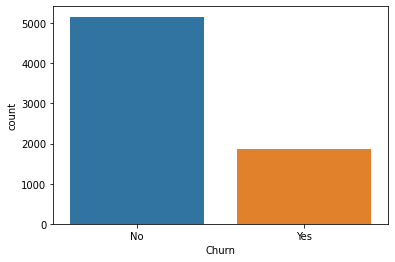

In [11]:
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

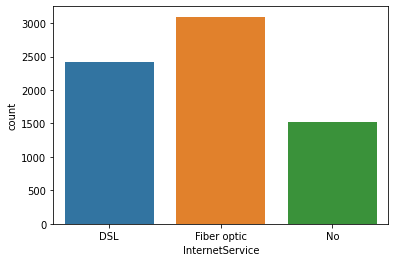

In [12]:
sns.countplot(data=df, x='InternetService')

<AxesSubplot:xlabel='gender', ylabel='count'>

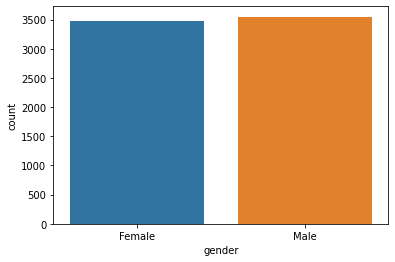

In [13]:
sns.countplot(data=df, x='gender')

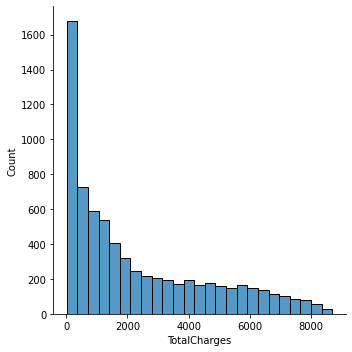

In [14]:
sns.displot(data=df['TotalCharges'])

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

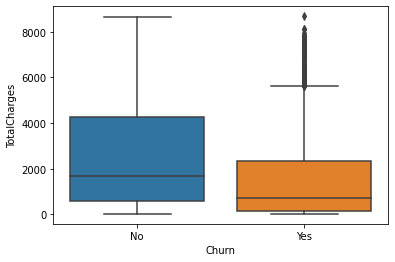

In [15]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

In [16]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

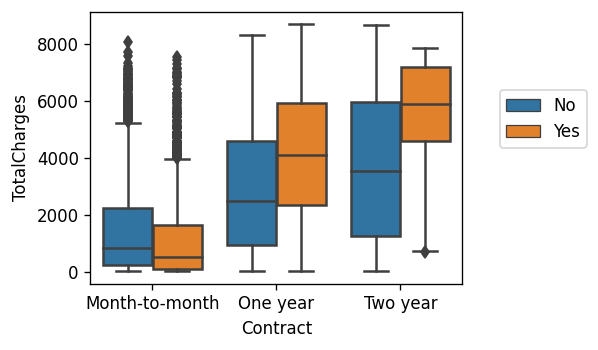

In [17]:
plt.figure(figsize=(4,3), dpi=120)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(1.1,0.5))

In [18]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

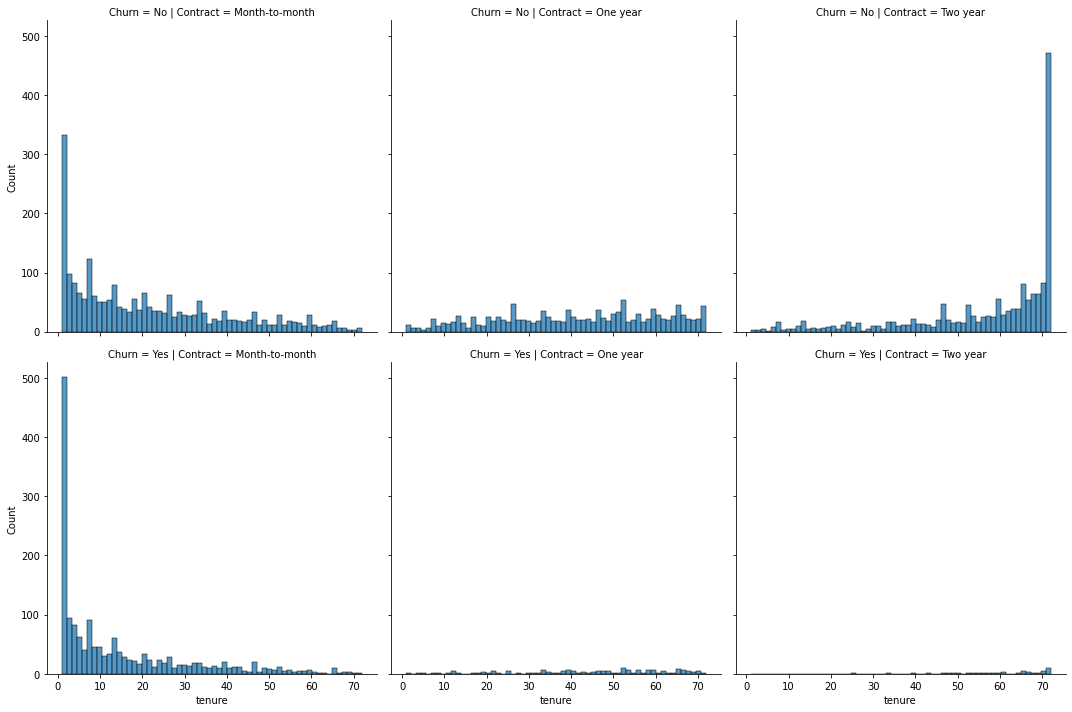

In [19]:
sns.displot(data=df, x='tenure', bins=60, col='Contract', row='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

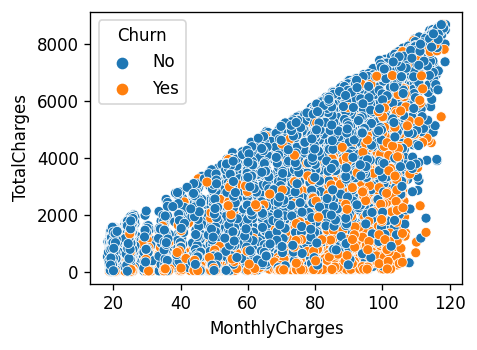

In [20]:
plt.figure(figsize=(4,3), dpi=120)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

In [21]:
tenure_churn = df.groupby(['tenure','Churn'])['tenure'].count().unstack(level=-1).reset_index()
tenure_churn.columns = ['tenure', 'Churn_No', 'Churn_Yes']

In [22]:
tenure_churn['Total'] = tenure_churn['Churn_No'] + tenure_churn['Churn_Yes']
tenure_churn['Churn_Percent'] = tenure_churn['Churn_Yes'].div(tenure_churn['Total'] )

<AxesSubplot:xlabel='tenure', ylabel='Churn_Percent'>

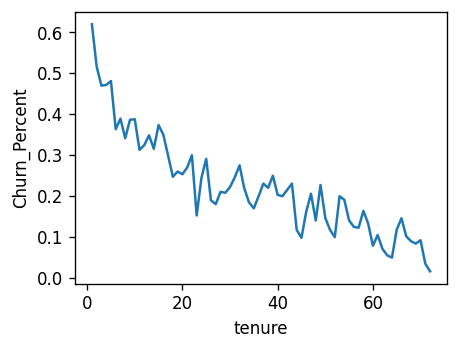

In [23]:
plt.figure(figsize=(4,3), dpi=120)
sns.lineplot(data=tenure_churn, x='tenure', y='Churn_Percent')

In [24]:
def tenure_length(x):
    if x < 13:
        return '0-12 months'
    elif x < 25:
        return '12-24 months'
    elif x < 49:
        return '24-48 months'
    else: 
        return 'Over 48 months'

In [25]:
df['TenureLength'] = df.tenure.map(lambda x: tenure_length(x))

<AxesSubplot:xlabel='TenureLength', ylabel='count'>

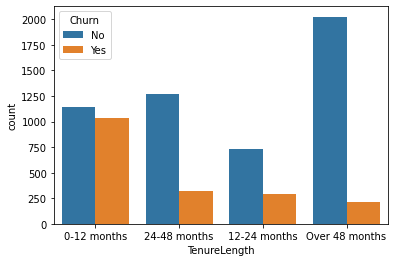

In [26]:
sns.countplot(data=df, x='TenureLength', hue='Churn')

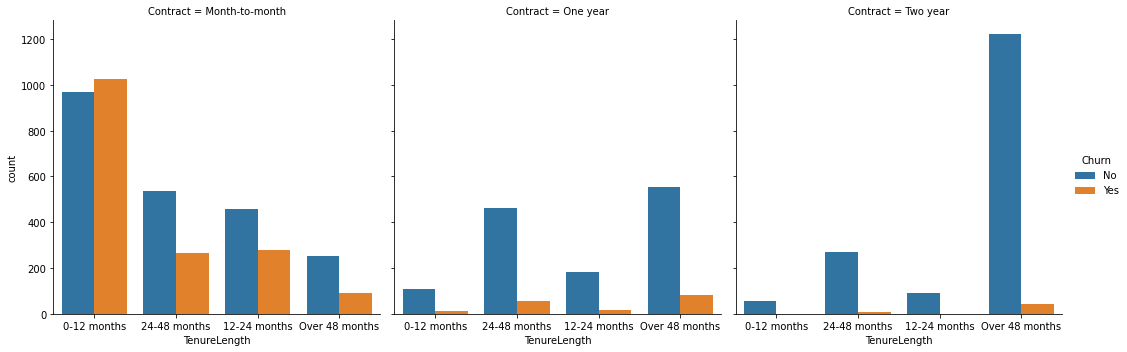

In [27]:
sns.catplot(data=df, x='TenureLength', hue='Churn', kind='count', col='Contract')

#### Creating dummy variables

In [28]:
df_dummies = pd.get_dummies(df)

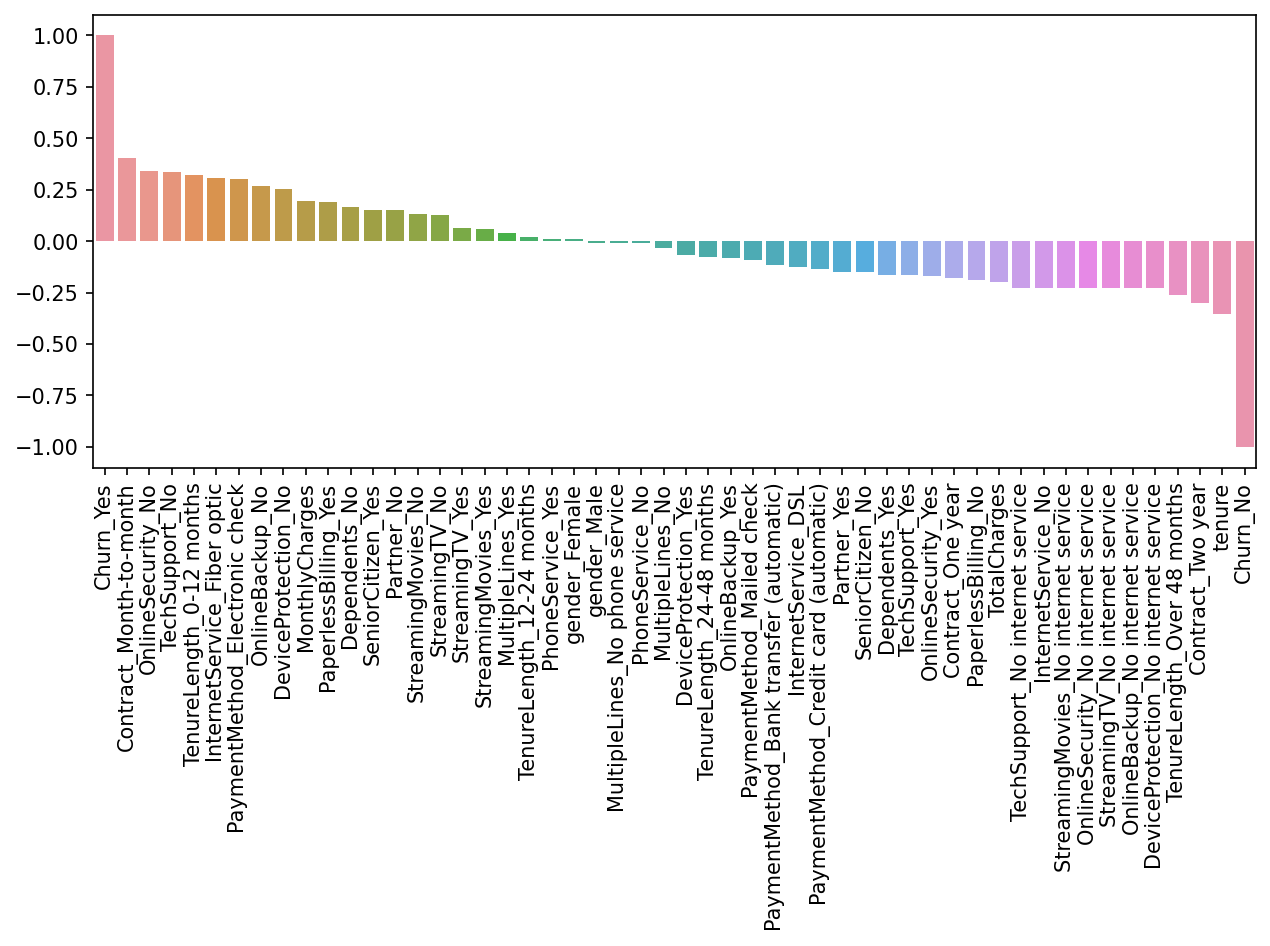

In [29]:
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(x=df_dummies.corr()['Churn_Yes'].sort_values(ascending=False).index, 
            y=df_dummies.corr()['Churn_Yes'].sort_values(ascending=False).values)
plt.xticks(rotation=90);

In [39]:
X = df.drop('Churn', axis=1)
y = df.Churn

In [40]:
X = pd.get_dummies(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Modeling

#### Decision trees

In [42]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [43]:
preds = dt.predict(X_test)

In [44]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.54      0.50      0.52       147

    accuracy                           0.81       704
   macro avg       0.70      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



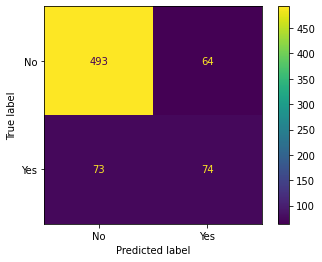

In [45]:
plot_confusion_matrix(dt, X_test, y_test)

In [46]:
imp_features = pd.DataFrame(index=X.columns, data=dt.feature_importances_, columns=['importance'])
imp_features = imp_features.reset_index()
imp_features.columns = ['features', 'importance']
imp_features = imp_features.sort_values(by='importance', ascending=False)
imp_features = imp_features[imp_features.importance>0]

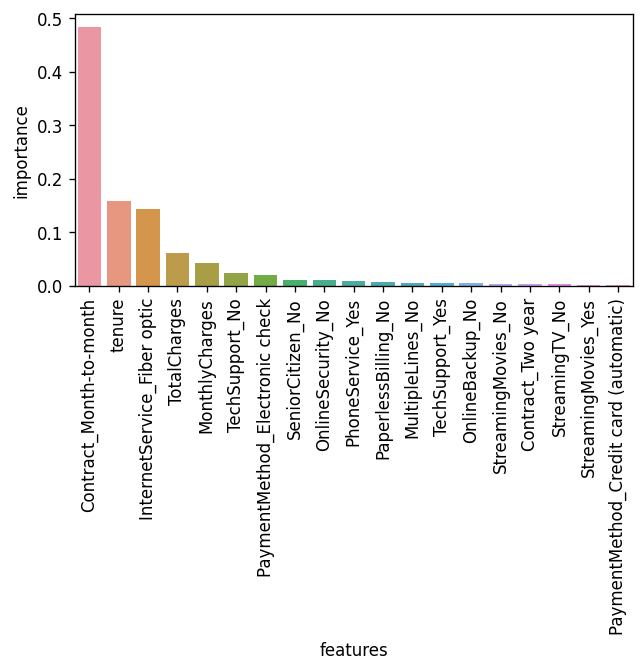

In [47]:
plt.figure(figsize=(6,3), dpi=120)
sns.barplot(data=imp_features, x='features', y='importance')
plt.xticks(rotation=90);

#### Random forest

In [48]:
rf = RandomForestClassifier()

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
preds = rf.predict(X_test)

In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.51      0.47      0.49       147

    accuracy                           0.79       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.79      0.79       704



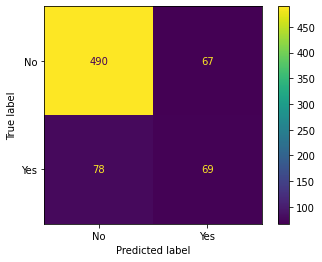

In [52]:
plot_confusion_matrix(rf, X_test, y_test)

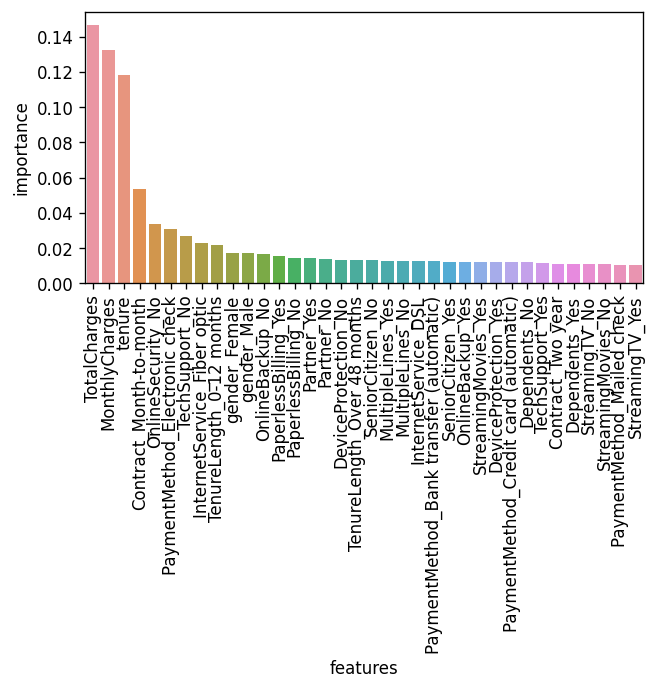

In [65]:
imp_features = pd.DataFrame(index=X.columns, data=rf.feature_importances_, columns=['importance'])
imp_features = imp_features.reset_index()
imp_features.columns = ['features', 'importance']
imp_features = imp_features.sort_values(by='importance', ascending=False)
imp_features = imp_features[imp_features.importance>0.01]
plt.figure(figsize=(6,3), dpi=120)
sns.barplot(data=imp_features, x='features', y='importance')
plt.xticks(rotation=90);

#### Boosted trees

In [66]:
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [67]:
ada.fit(X_train, y_train)
preds = ada.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



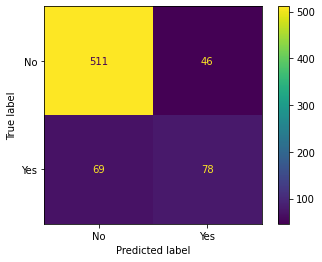

In [68]:
plot_confusion_matrix(ada, X_test, y_test)

In [69]:
gb.fit(X_train, y_train)
preds = gb.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



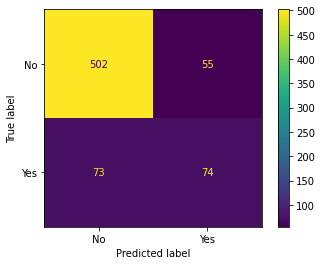

In [70]:
plot_confusion_matrix(gb, X_test, y_test)

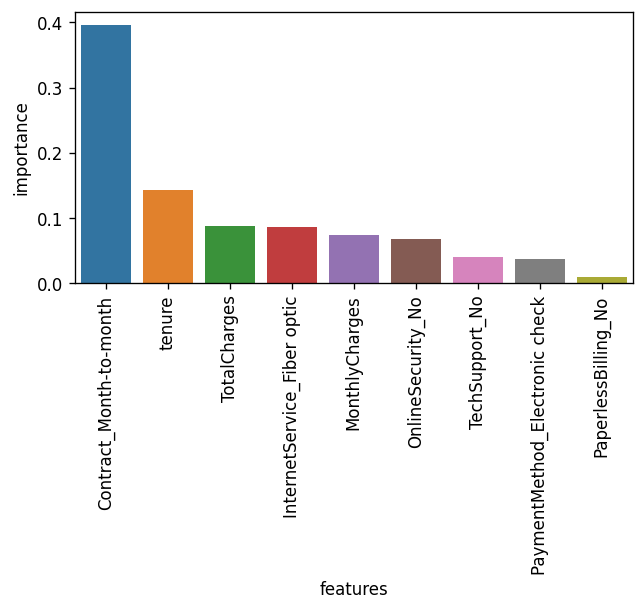

In [71]:
imp_features = pd.DataFrame(index=X.columns, data=gb.feature_importances_, columns=['importance'])
imp_features = imp_features.reset_index()
imp_features.columns = ['features', 'importance']
imp_features = imp_features.sort_values(by='importance', ascending=False)
imp_features = imp_features[imp_features.importance>0.01]
plt.figure(figsize=(6,3), dpi=120)
sns.barplot(data=imp_features, x='features', y='importance')
plt.xticks(rotation=90);